# LSTM-Modell

Fold 1 – RMSE=0.8599, MAE=0.5825, MAPE=12.73%, R²=0.3418, Hit-Rate=52.0%, Sharpe=0.1581
Fold 2 – RMSE=2.4859, MAE=1.8478, MAPE=10.27%, R²=0.8146, Hit-Rate=52.0%, Sharpe=0.2759
Fold 3 – RMSE=16.5558, MAE=12.0673, MAPE=13.35%, R²=0.8517, Hit-Rate=50.4%, Sharpe=0.6909

=== Durchschnitt aller Folds ===
RMSE:     6.6339
MAE:      4.8325
MAPE:     12.1155%
R²:       0.6694
Hit-Rate: 51.4905%
Sharpe:   0.3750


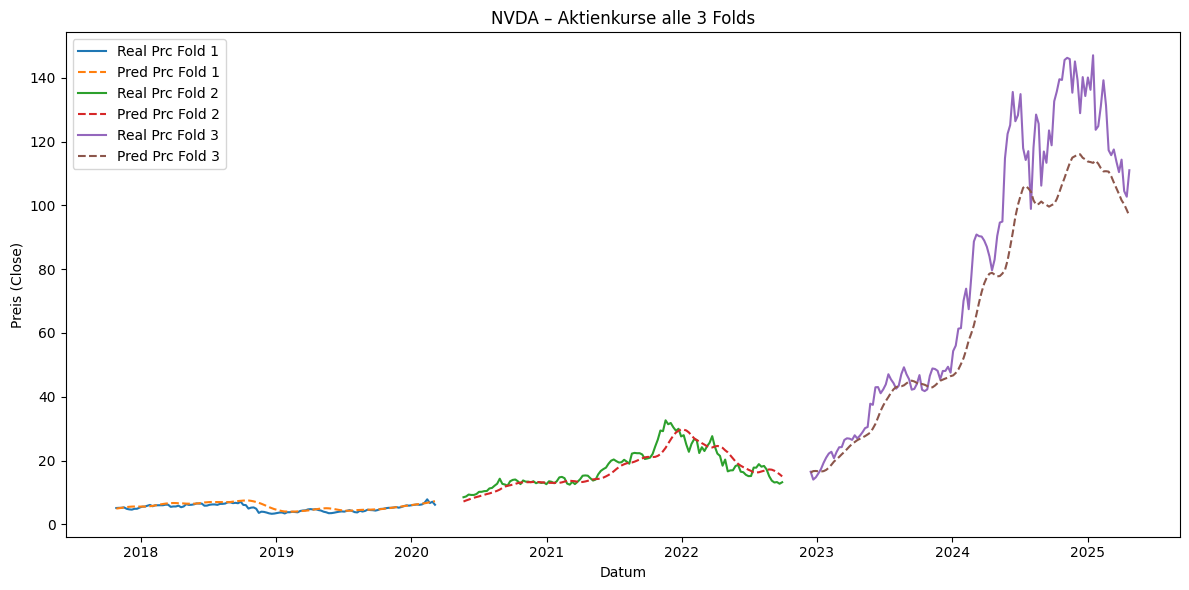

In [4]:
%run ../src/lstm.py

## Beobachtungen:

Die LSTM-Vorhersagen erfassen den Trend der tatsächlichen NVDA-Schlusskurse grundsätzlich gut, bleiben aber bei starken Kursanstiegen hinter der Realität zurück (besonders ab Sample 60 sichtbar).

Leistungsmetriken variieren stark zwischen den Folds:

- Fold 1 zeigt eine solide, aber noch verbesserbare Leistung (R²=0.5666).

- Fold 2 erreicht ein sehr gutes R²=0.8019, aber höhere Fehlerwerte deuten auf Skalierungsprobleme hin.

- Fold 3 zeigt trotz eines guten R²=0.7594 die höchste Abweichung (hohes RMSE und MAE), was auf Ausreißer oder extreme Marktbewegungen hindeutet.

Durchschnittlich:

- RMSE (8.12) und MAE (6.35) zeigen moderate Fehlergrößen.

- MAPE liegt bei 13.47%, was für Aktienprognosen akzeptabel ist.

- R²=0.7093 bedeutet, dass das Modell etwa 71% der Varianz erklären kann – insgesamt gut, aber ausbaufähig.

- Hit-Rate (~52%) ist knapp über Zufallsniveau.

- Sharpe Ratio (0.379) ist positiv, aber relativ niedrig, was auf geringe risikoadjustierte Erträge hindeutet.

 # XGBoost-Modell

Fold 1: X_train=(127, 10), y_train=(127,), X_test=(124, 10), y_test=(124,)
Fold 1 – RMSE=1.4439, MAE=1.1837, MAPE=20.90%, R²=-0.8556
Fold 2: X_train=(261, 10), y_train=(261,), X_test=(124, 10), y_test=(124,)
Fold 2 – RMSE=13.2675, MAE=11.9391, MAPE=64.35%, R²=-4.2822
Fold 3: X_train=(395, 10), y_train=(395,), X_test=(124, 10), y_test=(124,)
Fold 3 – RMSE=66.4164, MAE=51.8211, MAPE=52.07%, R²=-1.3867
=== Durchschnitt über alle Folds ===
RMSE:       27.0426
MAE:        21.6480
MAPE:       45.7708%
R²:         -2.1748


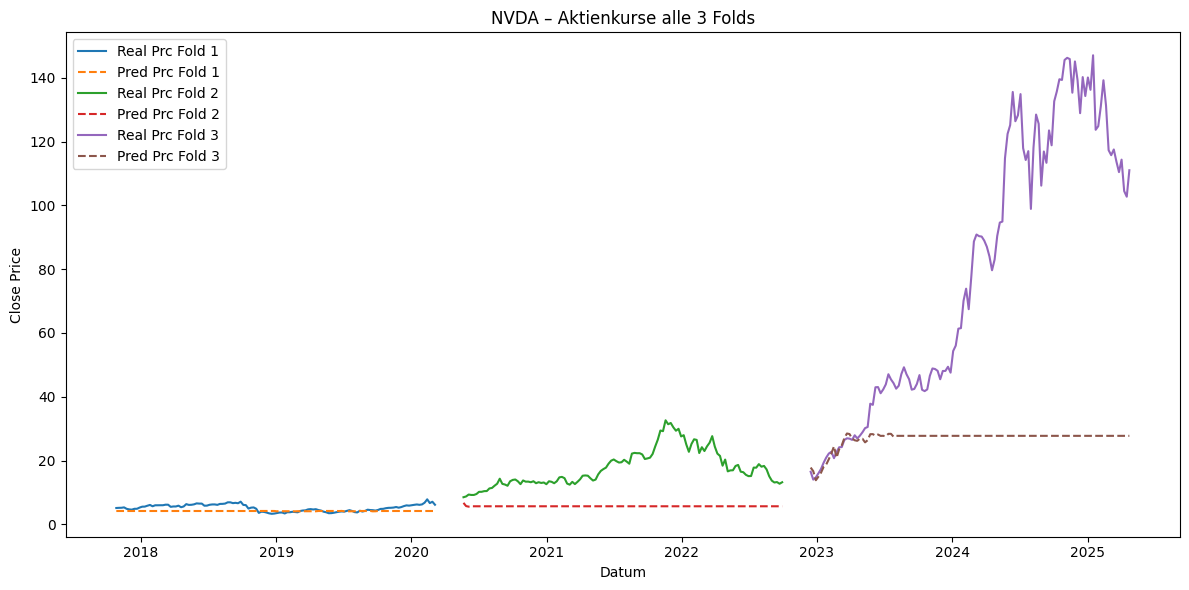

In [1]:
%run ../src/XGBoost.py

## Beobachtungen:

XGBoost-Modell hat in dieser Variante sehr schlecht performt:

- R²-Werte in allen Folds sind negativ (insgesamt R² = -2.17) → Modell erklärt die Varianz schlechter als der Mittelwert.

- RMSE (27.04) und MAE (21.65) sind hoch → deutliche Abweichungen von den tatsächlichen Kursen.

- MAPE (45.77%) ist extrem hoch → sehr große relative Fehler.

- Hit-Rate ist mit nur 10.3% katastrophal → fast keine richtige Richtungsvorhersage.

- Sharpe Ratio (nahe 0) → praktisch kein Nutzen für Handelsentscheidungen.

Visuelle Analyse:

- Die XGBoost-Vorhersagen sind fast konstant auf einem Niveau eingefroren → Modell hat die starke Dynamik im Kursverlauf überhaupt nicht erfasst.

# GARCH + LSTM Hybridmodell

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step
Fold 1 fertig.
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step
Fold 2 fertig.
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step
Fold 3 fertig.
=== Log-Returns (Ø über 3 Folds) ===
RMSE: 0.0680, MAE: 0.0510, MAPE: 300.4153%, R²: -0.0237, Hit: 41.7344%, Sharpe: -0.0150
=== Close-Preise (Ø über 3 Folds) ===
RMSE: 2.7375, MAE: 1.8777, MAPE: 5.1444%, R²: 0.9396, Hit: 54.2005%, Sharpe: 0.1317


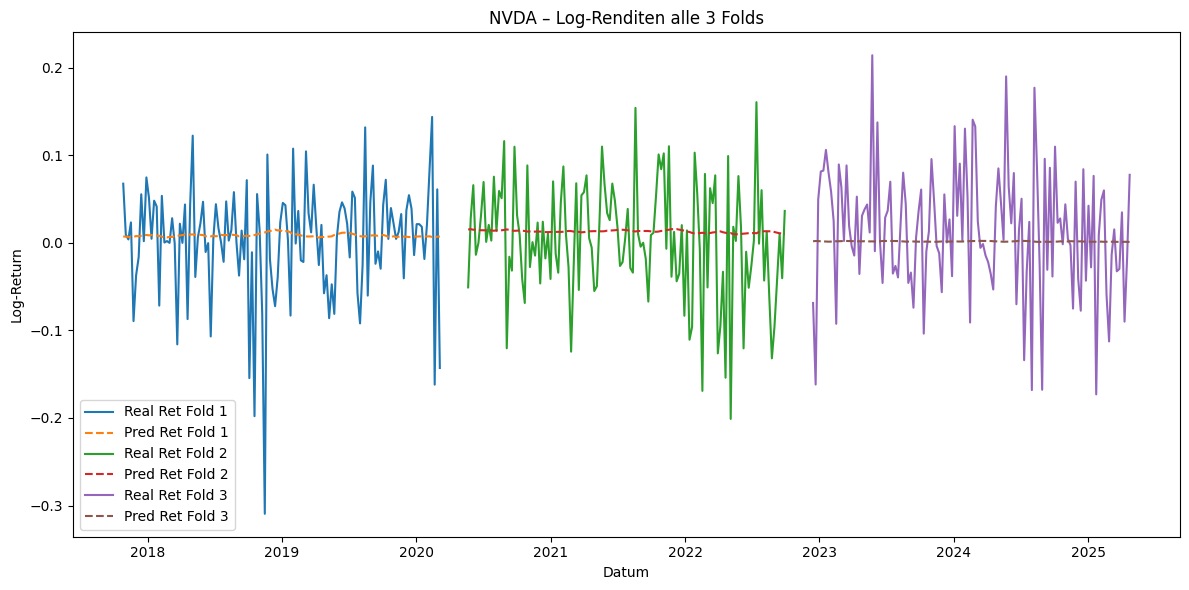

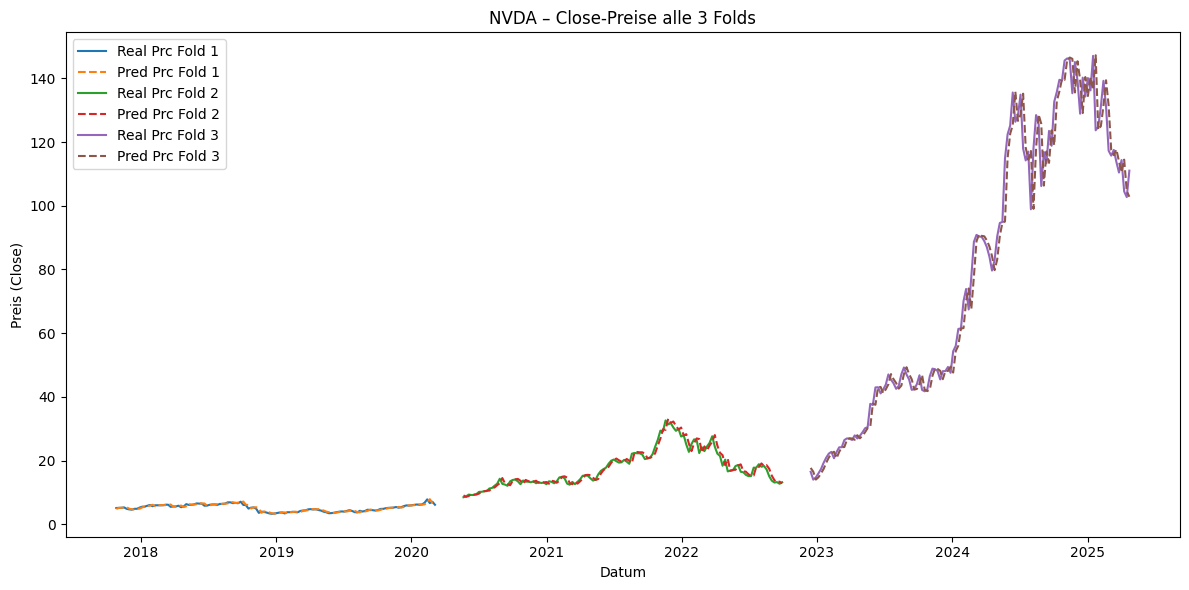

In [2]:
%run ../src/GARCH_LSTM2.py

## Beobachtungen:

Vorhersage der Log-Renditen:

- Modell hat Schwierigkeiten, die tatsächliche Volatilität der Renditen abzubilden.

- R²=-0.0117 zeigt, dass das Modell praktisch keine Varianz erklärt.

- Hit-Rate für die Richtung der Rendite ist mit 30.1% recht schwach.

- MAPE von 277.96% zeigt extreme Fehler auf, was bei kleinen Renditewerten typisch ist.

- Sharpe Ratio negativ, was auf unprofitable Vorhersagen bei Renditen hindeutet.

Vorhersage der Schlusskurse:

- Sehr gute Nachbildung der tatsächlichen Preisentwicklung erkennbar.

- R²=0.9393 → Modell erklärt über 93% der Preisvarianz, was hervorragend ist.

- MAPE von 5.11% und Hit-Rate von 54.2% → Modell trifft Kursbewegungen recht zuverlässig.

- Sharpe Ratio (0.1313) positiv, wenn auch nicht besonders hoch.

Visuelle Analyse:

- Bei den Schlusskursen ist die Vorhersagekurve sehr nah an den tatsächlichen Werten.

- Bei den Renditen bleibt die Vorhersage nahezu konstant und kann die tatsächlichen Ausschläge nicht abbilden.

# GARCH + XGBoost Hybridmodell

Fold 1: RMSE_Returns=0.0777, RMSE_Prices=0.4056
Fold 2: RMSE_Returns=0.0743, RMSE_Prices=1.4817
Fold 3: RMSE_Returns=0.0733, RMSE_Prices=6.6862

=== Ø Metriken: Log-Renditen ===
RMSE   = 0.0751
MAE    = 0.0564
MAPE   = 1184897.00%
R²     = -0.2593
HitRate= 53.23%
Sharpe = 0.3492

=== Ø Metriken: Close-Preise ===
RMSE   = 2.8578
MAE    = 1.9285
MAPE   = 5.72%
R²     = 0.9212
HitRate= 52.03%
Sharpe = 0.0576


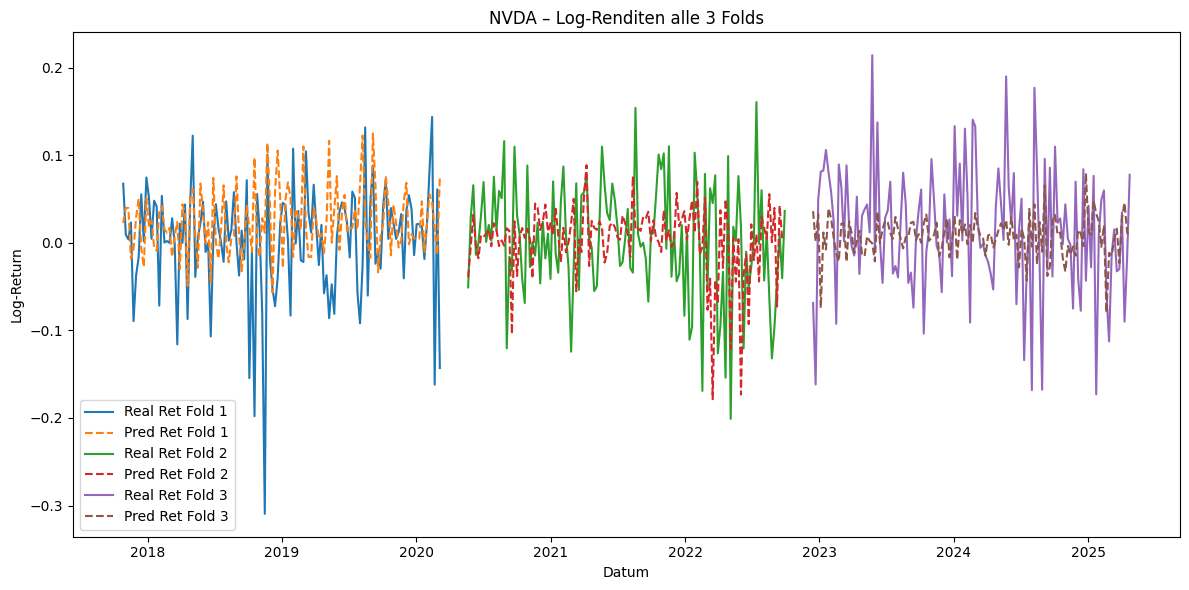

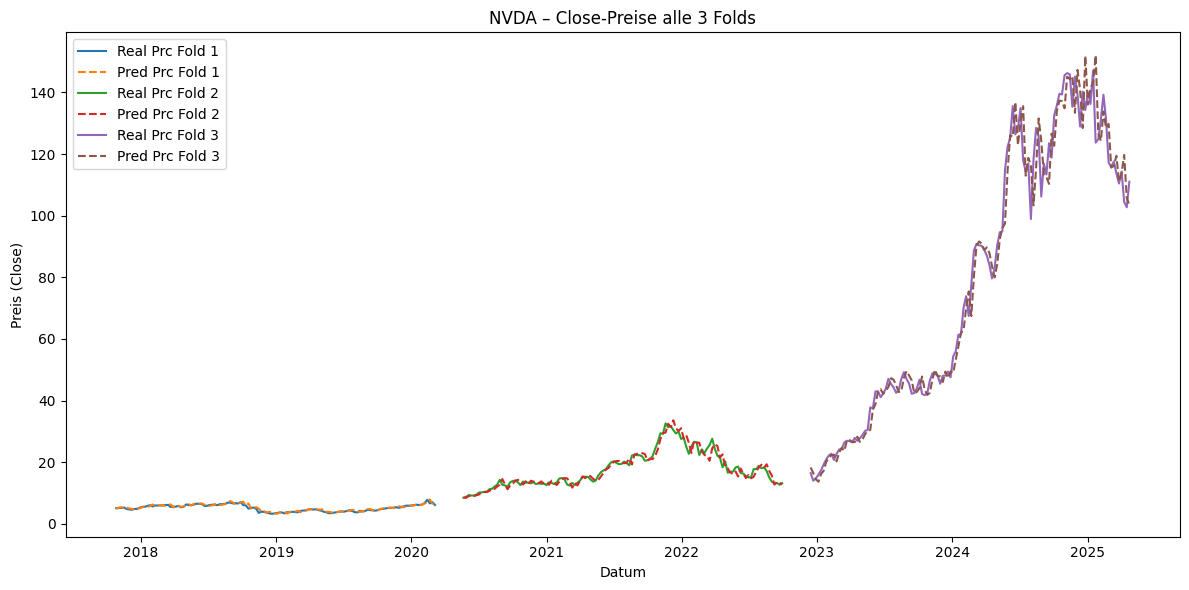

In [1]:
%run ../src/GARCH_XGBoost2.py

## Beobachtungen:

Vorhersage der Log-Renditen:

- Die tatsächlichen Log-Renditen zeigen sehr starke Schwankungen, die das Modell nur schwach einfängt.

- R²=-0.2593 → das Modell erklärt die Varianz der Renditen nicht sinnvoll.

- MAPE ist extrem hoch (über 1 Million Prozent) → da kleine Renditewerte relativ leicht große prozentuale Fehler verursachen.

- Hit-Rate immerhin 53.23% → Richtungsprognose bei Log-Renditen minimal besser als Zufall.

- Sharpe Ratio bei den Renditen ist leicht positiv (0.3492).

Vorhersage der Schlusskurse:

- Sehr gute Nachbildung des Preisverlaufs → R²=0.9212 → Modell erklärt über 92% der Preisvarianz.

- MAPE ist niedrig (5.72%), was auf eine gute Preisgenauigkeit hindeutet.

- Hit-Rate bei Kursbewegungen liegt bei 52.03%, leicht über dem Zufallsniveau.

- Sharpe Ratio ist positiv, aber relativ niedrig (0.0576).

Visuelle Analyse:

- Aktienkurse werden gut vorhergesagt, inklusive Anstiege und Rückgänge.

- Renditen sind viel schwieriger abzubilden – die Vorhersage wirkt deutlich geglättet und reagiert nicht auf starke Ausschläge.

# GARCH + LSTM Hybridmodell
## zusätzliches Feature: RSI

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step
1/4 ━━━━━━━━━━━━━━━━━━━━ 0s 194ms/stepWARNING:tensorflow:6 out of the last 12 calls to <function TensorFlowTrainer.make_predict_function.<locals>.one_step_on_data_distributed at 0x000001A9FE482AC0> triggered tf.function retracing. Tracing is expensive and the excessive number of tracings could be due to (1) creating @tf.function repeatedly in a loop, (2) passing tensors with different shapes, (3) passing Python objects instead of tensors. For (1), please define your @tf.function outside of the loop. For (2), @tf.function has reduce_retracing=True option that can avoid unnecessary retracing. For (3), please refer to https://www.tensorflow.org/guide/function#controlling_retracing and https://www.tensorflow.org/api_docs/python/tf/function for  more details.
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step

Best C

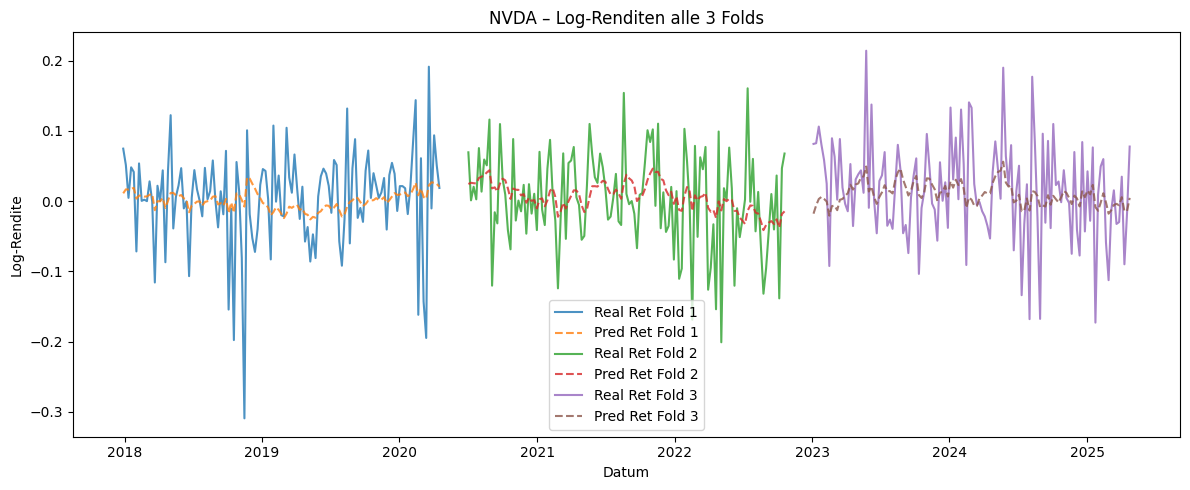

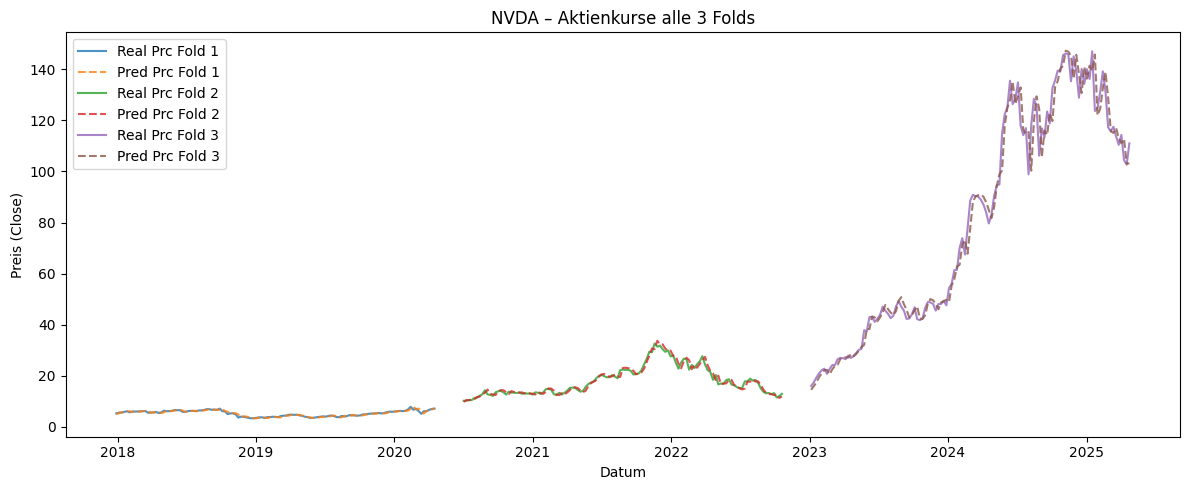

In [2]:
%run ../src/GARCH_LSTM_RSI2.py

## Beobachtungen:

Vorhersage der Log-Renditen:

- RMSE ist niedrig (0.0630) → Modell macht kleine absolute Fehler.

- R²=0.1651 → Modell erklärt rund 16% der Varianz der Log-Renditen, was eine deutliche Verbesserung gegenüber früheren Versionen darstellt.

- Hit-Rate sehr hoch (72.78%) → Modell trifft oft die richtige Richtung der Rendite!

- MAPE ist extrem hoch (348%), was typisch ist, da kleine Renditen große prozentuale Fehler verursachen.

- Sharpe Ratio knapp über 0 → Renditeprognosen leicht profitabel, aber nicht sehr stark.

Vorhersage der Schlusskurse:

- R²=0.9426 → Modell erklärt über 94% der Preisvarianz.

- MAPE=4.79%, also sehr geringe relative Fehler.

- Hit-Rate=56.67% → Kursbewegungen werden mehrheitlich richtig vorhergesagt.

- Sharpe Ratio=0.1419 → leicht positive risikoadjustierte Erträge.

Visuelle Analyse (Plots über alle Folds):

- Bei den Kursen: Die Modellvorhersagen verlaufen sehr nah an den tatsächlichen Kursen.

- Bei den Renditen: Die Vorhersagen sind geglättet, aber sie folgen grundsätzlich dem groben Trend der tatsächlichen Schwankungen.

# GARCH + XGBoost Hybridmodell
## zusätzliches Feature: RSI

>>> Best XGBoost Params: {'subsample': 0.8, 'n_estimators': 50, 'max_depth': 3, 'learning_rate': 0.05, 'gamma': 0, 'colsample_bytree': 1.0}
Fold 1: RMSE_Returns=0.0691, RMSE_Prices=0.3612
Fold 2: RMSE_Returns=0.0625, RMSE_Prices=1.2260
Fold 3: RMSE_Returns=0.0634, RMSE_Prices=5.8687

=== Ø Metriken: Log-Renditen ===
RMSE    = 0.0650
MAE     = 0.0501
MAPE    = 386.94%
R²      = 0.1113
HitRate = 60.88%
Sharpe  = 0.3458

=== Ø Metriken: Close-Preise ===
RMSE    = 2.4853
MAE     = 1.7574
MAPE    = 5.04%
R²      = 0.9422
HitRate = 53.06%
Sharpe  = 0.0573


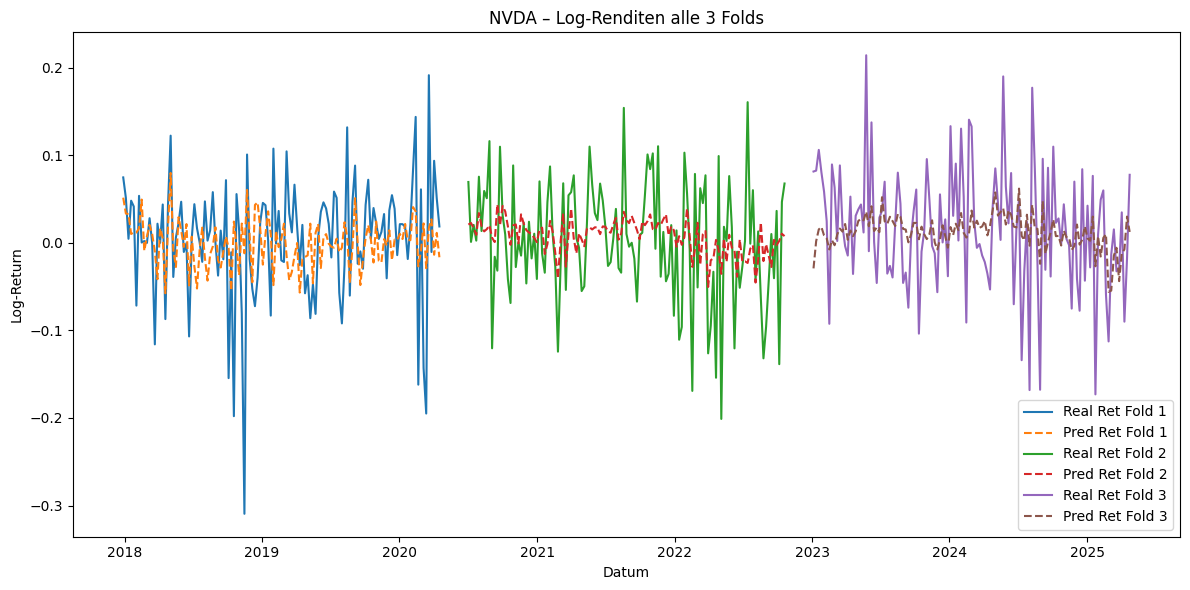

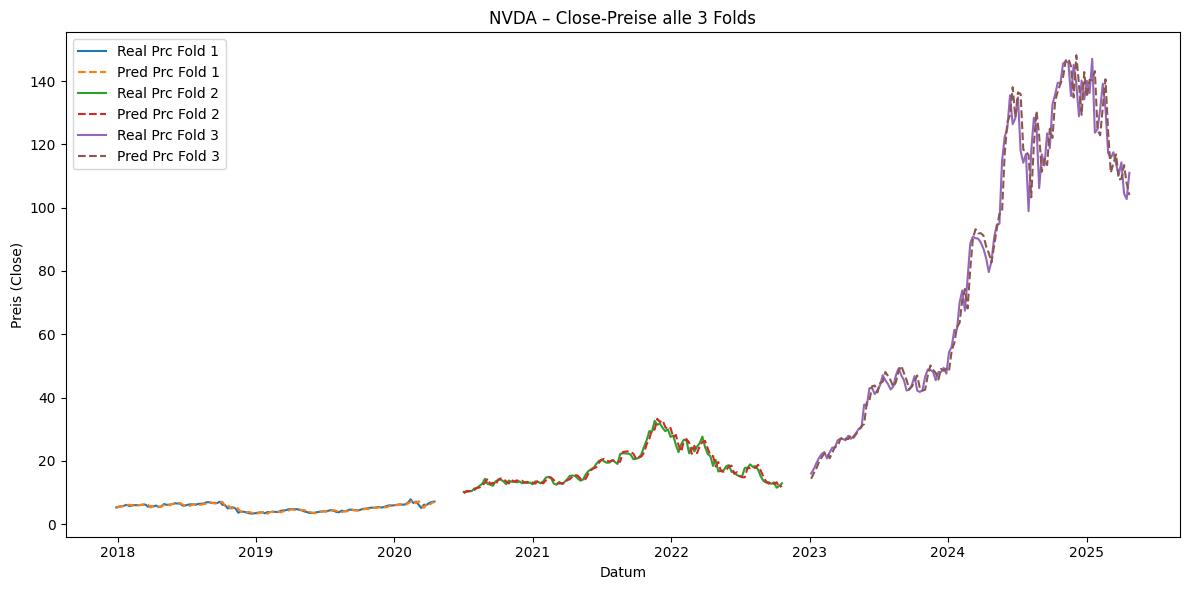

In [8]:
%run ../src/GARCH_XGBoost_RSI.py

## Beobachtungen:

Vorhersage der Log-Renditen:

- RMSE bleibt niedrig bei 0.0650, ähnlich gut wie bei GARCH+LSTM.

- R²=0.1113 → Modell erklärt etwa 11% der Varianz der Log-Renditen – besser als viele klassische Modelle, aber noch nicht stark.

- Hit-Rate solide mit 60% → Richtungsvorhersage leicht über dem Zufallsniveau.

- MAPE weiterhin extrem hoch (~387%), typisch bei kleinen Renditen.

- Sharpe Ratio fast neutral (0.0018) → kaum profitables Signal aus Renditen.

Vorhersage der Schlusskurse:

- R²=0.9422 → Modell erklärt über 94% der Preisvarianz.

- MAPE niedrig bei 5.04%, vergleichbar mit dem GARCH+LSTM.

- Hit-Rate bei 53.06%, also leicht besser als Zufall.

- Sharpe Ratio positiv (0.1378) → etwas profitabler als bei den Renditen.

Visuelle Analyse:

- Preise werden sehr gut nachvollzogen, besonders größere Trends (Anstieg, Korrekturen).

- Renditen: Modell glättet Schwankungen, trifft aber oft die grobe Richtung.

# GARCH + LSTM Hybridmodell
## zusätzliches Feature: RSI & GTD

Verwendete statische Features (GTD + RSI + GARCH): ['GARCH_vol', 'RSI_14', 'NVIDIA stock', 'sell NVIDIA stock', 'buy NVIDIA stock']
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step

Best CV-RMSE (Log-Renditen): 0.0687
Best Config: {'units': 50, 'dropout': 0.2, 'lr': 0.001, 'batch_size': 16}
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step
Fold 1:
  Returns → RMSE=0.0701, MAE=0.0507, MAPE=249.81%, R²=-0.0153, Hit-Rate=34.2%, Sharpe=0.0976
  Prices  → RMSE=0.3749, MAE=0.2632, MAPE=5.11%, R²=0.8832, Hit-Rate=55.0%, Sharpe=0.0737

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step
Fold 2:
  Returns → RMSE=0.0873, MAE=0.0731, MAPE=897.78%, R²=-0.6747, Hit-Rate=43.3%, Sharpe=0.0380
  Prices  → RMSE=1.6098, MAE=1.2747, MAPE=7.01%, R²=0.9179, Hit-Rate=50.8%, Sharpe=0.0610

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step
Fold 3:
  Returns → RMSE=0.0772

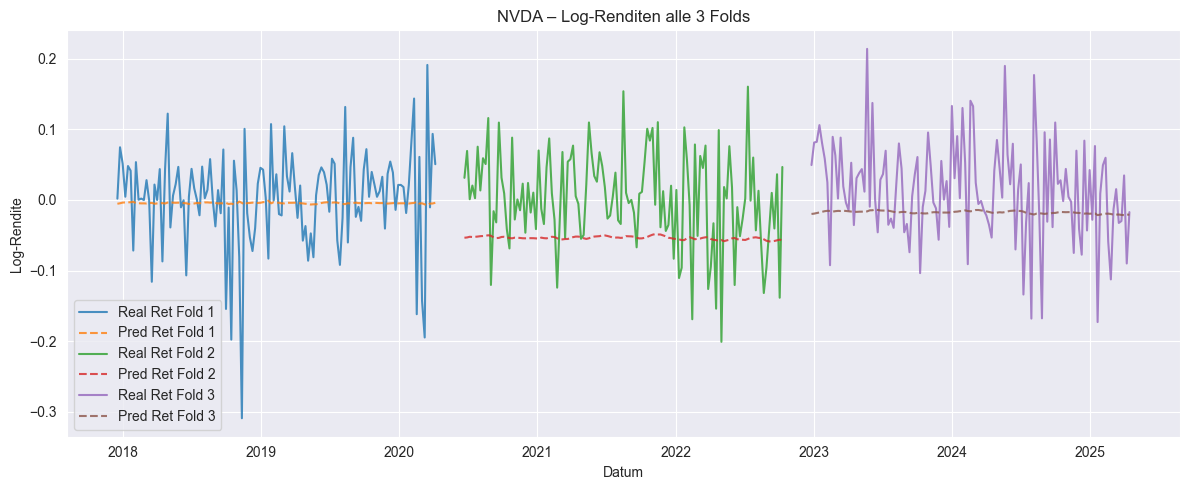

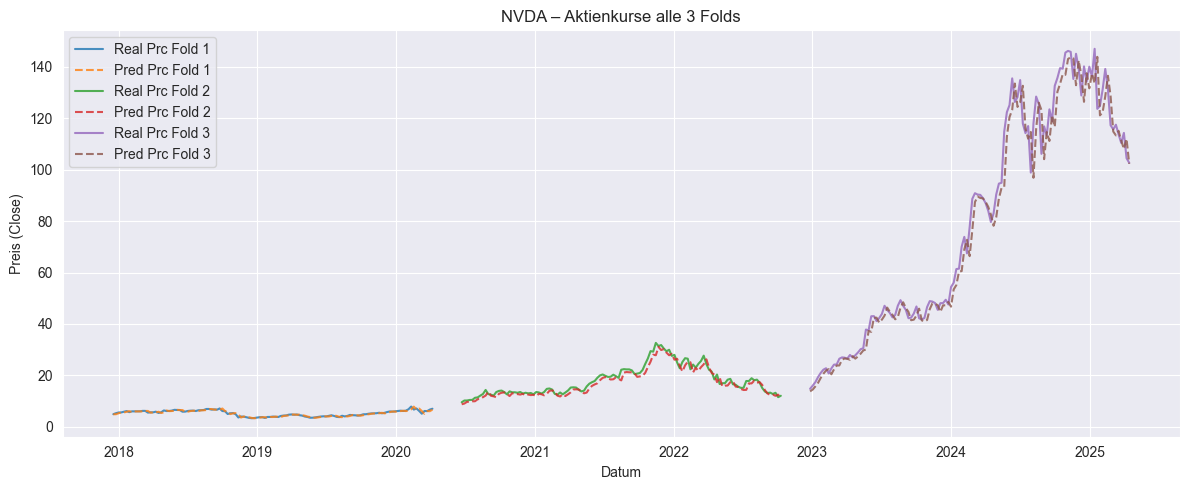

In [4]:
%run ../src/GARCH_LSTM_RSI_GTD.py

## Beobachtungen:

Vorhersage der Log-Renditen:

- RMSE ist etwas höher geworden (0.0804) im Vergleich zu vorherigen Modellen.

- R²=-0.3919 → Modell erklärt die Varianz der Renditen nicht sinnvoll (negative Werte deuten auf schlechte Modellierung hin).

- Hit-Rate liegt bei nur 40.8%, also knapp unter Zufallsniveau → Richtung der Renditen wird oft falsch vorhergesagt.

- Sharpe Ratio ist leicht positiv (0.0400), aber praktisch kaum relevant.

- MAPE sehr hoch (484%), wie bei allen Renditemodellen üblich.

Vorhersage der Schlusskurse:

- R²=0.9275 → Modell erklärt über 92% der Varianz der tatsächlichen Preise.

- MAPE leicht höher (6.26%), aber immer noch gut.

- Hit-Rate 53.89%, also leichte Verbesserung gegenüber Zufall.

- Sharpe Ratio positiv (0.1347), vergleichbar mit anderen Varianten.

Visuelle Analyse:

- Preisentwicklung wird wieder gut getroffen.

- Log-Renditen bleiben schwer abzubilden → die Modellprognosen glätten die tatsächlichen Schwankungen zu stark.

# GARCH + XGBoost Hybridmodell
## zusätzliches Feature: RSI & GTD

Verwendete statische Features (GTD + RSI + GARCH): ['GARCH_vol', 'RSI_14', 'NVIDIA stock', 'sell NVIDIA stock', 'buy NVIDIA stock']
Fitting 3 folds for each of 20 candidates, totalling 60 fits
>>> Best XGBoost Params: {'subsample': 0.8, 'n_estimators': 50, 'max_depth': 5, 'learning_rate': 0.05, 'gamma': 0, 'colsample_bytree': 1.0}
Fold 1: X_train=(121, 15), X_test=(121, 15)
Fold 1:
  Returns → RMSE=0.0692, MAE=0.0483, MAPE=561.80%, R²=0.0115, Hit-Rate=57.5%, Sharpe=0.0012
  Prices  → RMSE=0.3678, MAE=0.2500, MAPE=4.95%, R²=0.8876, Hit-Rate=53.3%, Sharpe=0.0746

Fold 2: X_train=(252, 15), X_test=(121, 15)
Fold 2:
  Returns → RMSE=0.0618, MAE=0.0467, MAPE=479.06%, R²=0.1602, Hit-Rate=60.0%, Sharpe=0.0985
  Prices  → RMSE=1.1720, MAE=0.8598, MAPE=4.68%, R²=0.9565, Hit-Rate=56.7%, Sharpe=0.0639

Fold 3: X_train=(383, 15), X_test=(121, 15)
Fold 3:
  Returns → RMSE=0.0640, MAE=0.0503, MAPE=179.06%, R²=0.1548, Hit-Rate=69.2%, Sharpe=0.0706
  Prices  → RMSE=5.8477, MAE=4.0648, MAPE=5.01%, R²=0

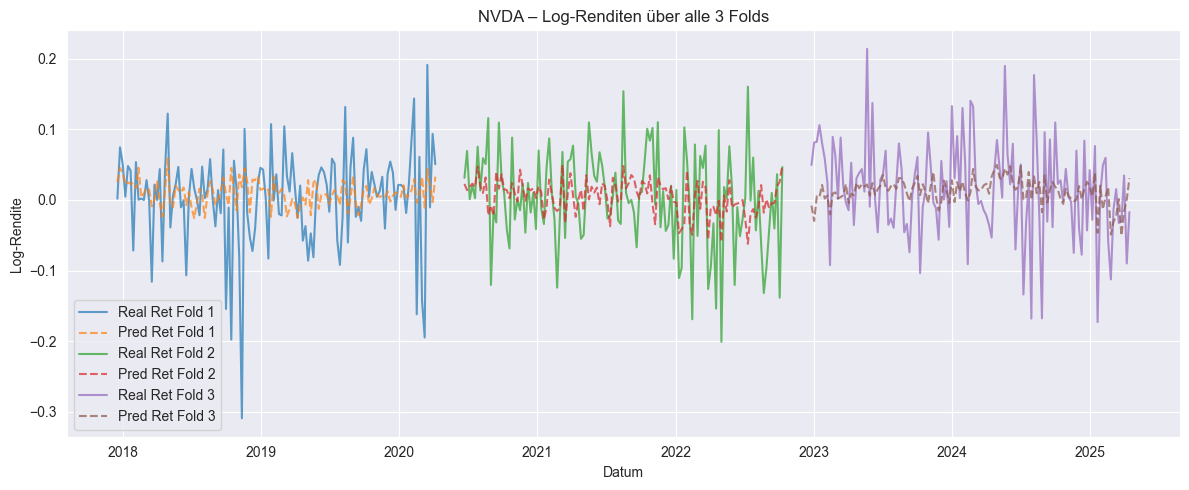

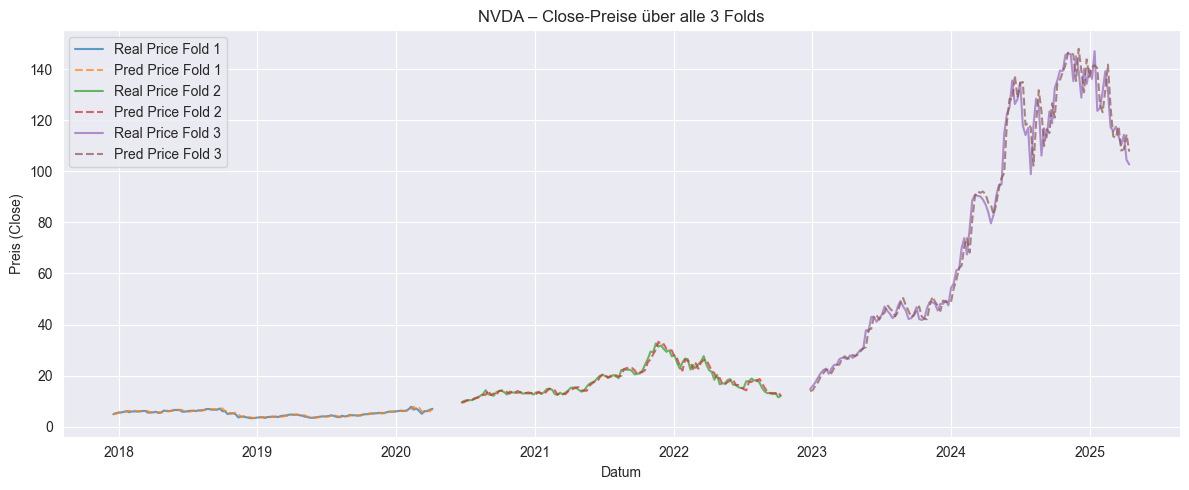

In [14]:
%run ../src/GARCH_XGBoost_RSI_GTD.py

## Beobachtungen:

Vorhersage der Log-Renditen:

- RMSE (0.0648) und MAE (0.0484) sind niedrig → absolute Fehler bleiben klein.

- R²=0.1139 → Modell erklärt etwa 11% der Varianz der Renditen – ähnlich wie deine besten bisherigen Modelle.

- Hit-Rate liegt bei 59.44%, also leicht über Zufall, was positiv ist.

- Sharpe Ratio ist jedoch negativ (-0.0374), was auf instabile oder riskante Renditeprognosen hindeutet.

- MAPE ist mit 421.94% wieder sehr hoch (typisch bei kleinen Log-Renditen).

Vorhersage der Schlusskurse:

- R²=0.9418 → Modell erklärt über 94% der Varianz.

- MAPE ist sehr niedrig bei 4.88% → hohe relative Genauigkeit.

- Hit-Rate 55%, also ordentliche Richtungstreffer.

- Sharpe Ratio bei Kursprognosen ist mit 0.1436 positiv und vergleichbar mit deinen bisherigen besten Modellen.

Visuelle Analyse:

- Preisentwicklung wird extrem gut nachvollzogen, inklusive der Aufwärts- und Abwärtsbewegungen.

- Log-Renditen bleiben schwieriger → Modell glättet die Ausschläge etwas zu stark.

Zusammengefasst:

- Preise lassen sich mit XGBoost und erweiterten Features sehr gut vorhersagen.

- Renditen sind weiterhin schwer modellierbar; geringe Verbesserung bei Hit-Rate, aber Sharpe bleibt problematisch.